# ANALYSE DES CORRELATIONS

Afin de réduire la dimensionnalité de notre dataframe, on va etudier plusieurs points :
1. La correlation des features à la TARGET : Des features trop corrélées peuvent être caractéristiques d'un data leakage, tandis que des features trop peu corrélées peuvent ne pas être nécessaires.
2. La corrélations entre les features, car on souhaite disposer de variables indépendantes. Par ailleurs, la présence de variables tres corrélées a tendance à biaiser les modèles type Random Forest.

In [1]:
import pandas as pd
import  mbr_kernel as mkn
import numpy as np

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

from sklearn.feature_selection import SelectKBest, f_classif

# Modules perso
import outils_feature_engineering_810 as fe810

TEST_SIZE = 0.2
RANDOM_STATE = 42
GIT_FOLDER = './'
INPUT_FOLDER = GIT_FOLDER + 'input_data/'
DOSSIER_IMG = GIT_FOLDER+'temp_img/'


In [2]:
def transform_X(X):
    imputer = SimpleImputer(missing_values=np.nan, strategy='median')
    scaler = StandardScaler()
    X_imp = imputer.fit_transform(X)
    X_sc = scaler.fit_transform(X_imp)
    new_X=pd.DataFrame(X_sc, columns=X.columns.tolist())
    return  new_X

# 1. Data preprocessing

In [3]:
df_train = pd.read_csv('./input_data/application_train.csv')
df = mkn.full_feature_engineering(df_input = df_train, df_folder=INPUT_FOLDER)

Forme initiale du Dataframe :  (307511, 122)


/home/maximorose/git_repositories/cln_oc_p07/outils_feature_engineering_810.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res_df.drop(columns=['taux_nan'], inplace=True)
/home/maximorose/git_repositories/cln_oc_p07/mbr_kernel.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'DAYS_EMPLOYED'].replace(365243, np.nan, inplace=True)
/home/maximorose/git_repositories/cln_oc_p07/mbr_kernel.py:186: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

Forme du Dataframe apres traitement :  (219656, 122)

Application dataframe shape:  (219656, 14)
application processing - done in 1s
Forme initiale du Dataframe :  (1716428, 17)
Forme du Dataframe apres traitement :  (1716428, 17)
Bureau dataframe shape:  (305811, 8)
Bureau and bureau_balance processing - done in 7s
Forme initiale du Dataframe :  (1670214, 37)


/home/maximorose/git_repositories/cln_oc_p07/outils_feature_engineering_810.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res_df.drop(columns=['taux_nan'], inplace=True)


Forme du Dataframe apres traitement :  (1234578, 37)
Forme initiale du Dataframe :  (13605401, 8)
Forme du Dataframe apres traitement :  (13605401, 8)
Previous Application dataframe shape:  (338308, 12)
Previous application processing - done in 22s
Pos-Cash dataframe shape:  (337252, 3)
Pos-Cash processing - done in 5s
Installement dataframe shape:  (339587, 7)
Installment processing - done in 14s
CC dataframe shape:  (103558, 6)
CC processing - done in 6s


In [4]:
X = df.drop(columns = ['SK_ID_CURR', 'TARGET'])
y = df['TARGET']
Xt = transform_X(X)

# 1. Etude correlation to target
## 1.1. Using f_classif
"Intuitively, it is the ratio of (variance in output feature(y) explained by input feature(X) and variance in output feature(y) not explained by input feature(X))."

More info :
- [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_classif.html)
- [stack exchange](https://datascience.stackexchange.com/questions/74465/how-to-understand-anova-f-for-feature-selection-in-python-sklearn-selectkbest-w)

In [6]:
bestfeatures = SelectKBest(f_classif, k=Xt.shape[1])
fit = bestfeatures.fit(Xt,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                          Specs        Score
12        BURO_DAYS_CREDIT_MEAN  1446.144079
45            CC_LIMIT_USE_MEAN  1108.324727
7         CREDIT_TO_GOODS_RATIO  1027.591502
5                     AGE_RANGE  1009.040450
1                 DAYS_EMPLOYED   859.751649
17          BURO_HAS_CREDIT_SUM   826.477638
26  PREV_HAD_LATE_PAYMENTS_MEAN   814.390437
3   REGION_RATING_CLIENT_W_CITY   681.541132
11    NAME_EDUCATION_TYPE_CATed   675.850075
47  CC_DRAWING_LIMIT_RATIO_MEAN   543.324347


/home/maximorose/.local/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [31] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/maximorose/.local/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [7]:
featureScores.nlargest(15,'Score')

,Specs,Score
12,BURO_DAYS_CREDIT_MEAN,1446.144079
45,CC_LIMIT_USE_MEAN,1108.324727
7,CREDIT_TO_GOODS_RATIO,1027.591502
5,AGE_RANGE,1009.040450
1,DAYS_EMPLOYED,859.751649
17,BURO_HAS_CREDIT_SUM,826.477638
26,PREV_HAD_LATE_PAYMENTS_MEAN,814.390437
3,REGION_RATING_CLIENT_W_CITY,681.541132
11,NAME_EDUCATION_TYPE_CATed,675.850075
47,CC_DRAWING_LIMIT_RATIO_MEAN,543.324347


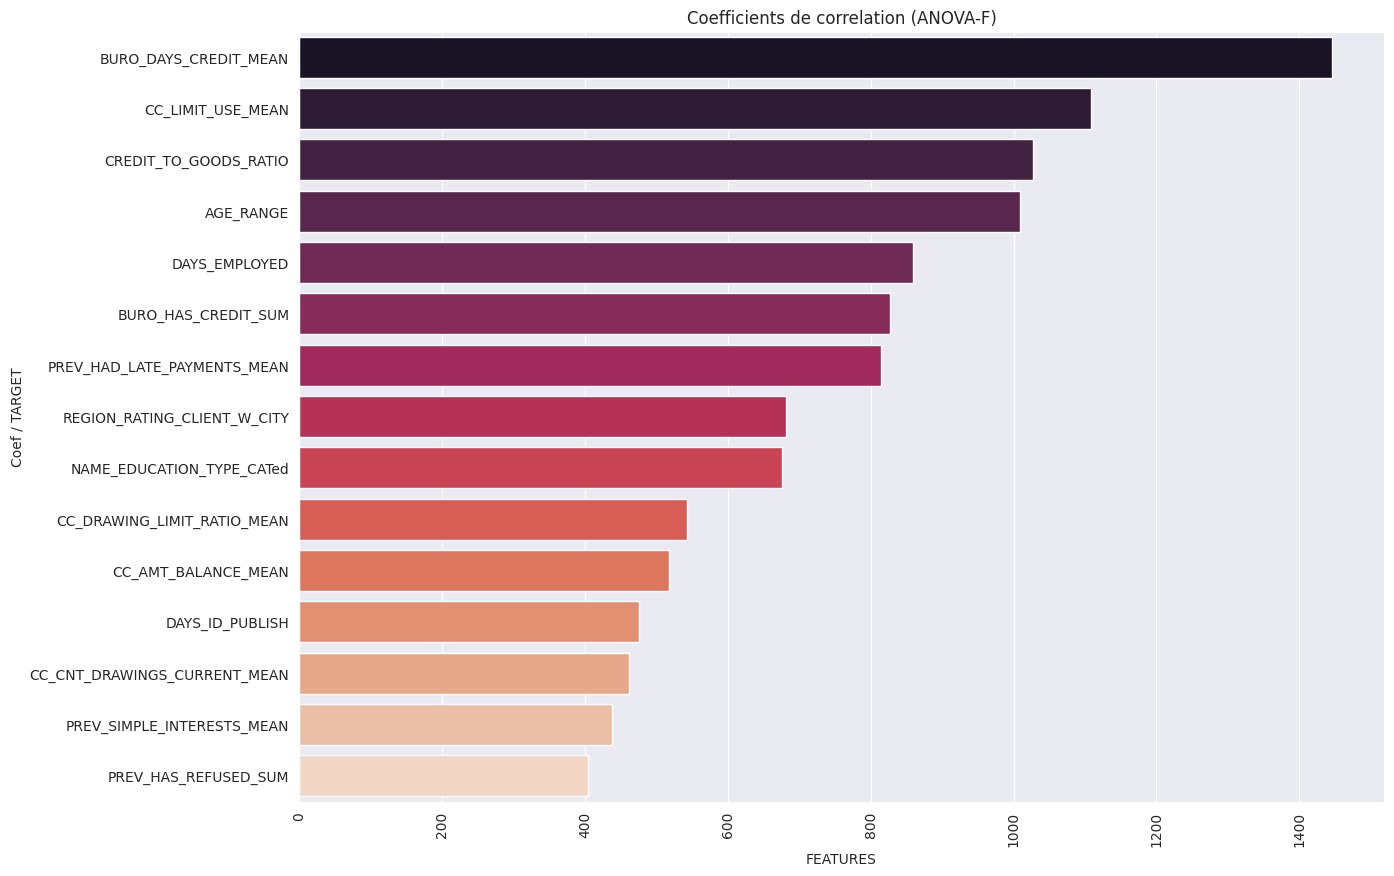

In [8]:
fe810.display_barchart_bivar_correlation(df_poids=featureScores.nlargest(15,'Score'), col_nom='Specs', col_corr='Score', coef='ANOVA-F')

## 1.2. Using Pearson's

In [9]:
top_feat_list = featureScores.nlargest(15,'Score')['Specs'].values

In [10]:
smdf = Xt
smdf['TARGET'] = y
smdf.shape

(219656, 49)

In [11]:
corrmat = smdf.corr()
abs_corrmat = np.abs(corrmat)

In [12]:
abs_corrmat.sort_values(by=['TARGET'], ascending=False)['TARGET'].head(15).reset_index()

,index,TARGET
0,TARGET,1.000000
1,BURO_DAYS_CREDIT_MEAN,0.080868
2,CC_LIMIT_USE_MEAN,0.070857
3,CREDIT_TO_GOODS_RATIO,0.068254
4,AGE_RANGE,0.067676
5,DAYS_EMPLOYED,0.062434
6,BURO_HAS_CREDIT_SUM,0.061193
7,PREV_HAD_LATE_PAYMENTS_MEAN,0.060770
8,REGION_RATING_CLIENT_W_CITY,0.055611
9,NAME_EDUCATION_TYPE_CATed,0.055418


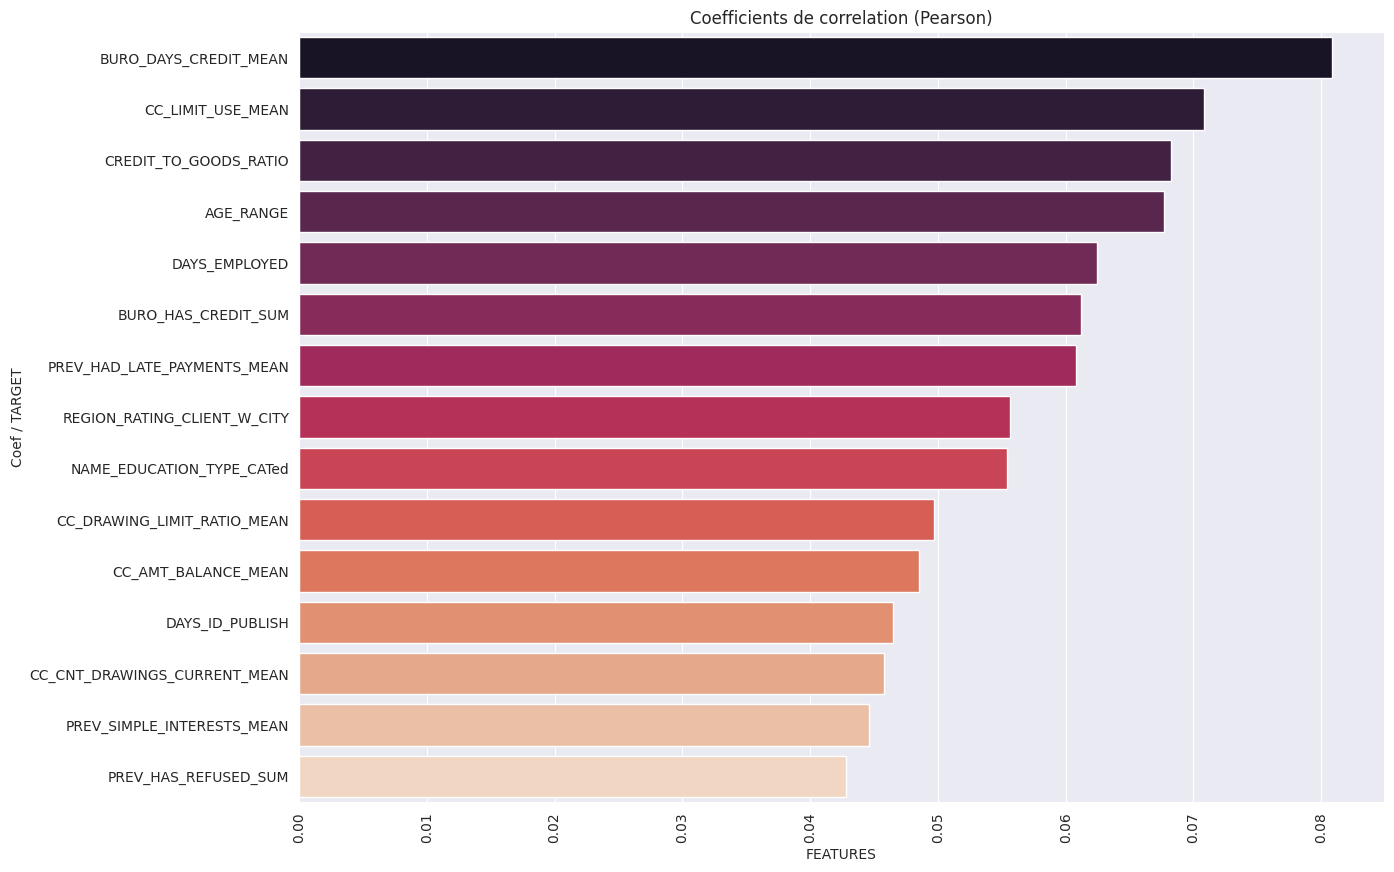

In [13]:
shortlist = abs_corrmat.sort_values(by=['TARGET'], ascending=False)['TARGET'].head(16).reset_index()
shortlist = shortlist[shortlist['index']!='TARGET']
fe810.display_barchart_bivar_correlation(df_poids=shortlist, col_nom='index', col_corr='TARGET')

## Synthese.
Les variables EXT_SOURCE_1, 2 et 3 sont très corrélées à la TARGET. Bien plus que les autres. On pourrait soupçonner un data leakage. Cependant, ces features apparaissent aussi dans les données de production, donc peuvent-elles vraiment être liée à la TARGET ?

La description des features indique "Normalized score from external data source". On pourrait imaginer que c'est un scoring issue d'un tiers partenaire. Si ce partenaire est bon dans son travail, cela justifie une grande correlation a la TARGET :).

Apres realisation du Dashboard et consideration de la présence systématique de ces variables dans les SHAP FORCE analysis. J'ai pris la décision de les enlever.

# 2. Correlations inter-features

In [14]:
threshold = 0.7

In [15]:
globale_corr = Xt.corr()
highly_correlated = globale_corr.abs() > threshold

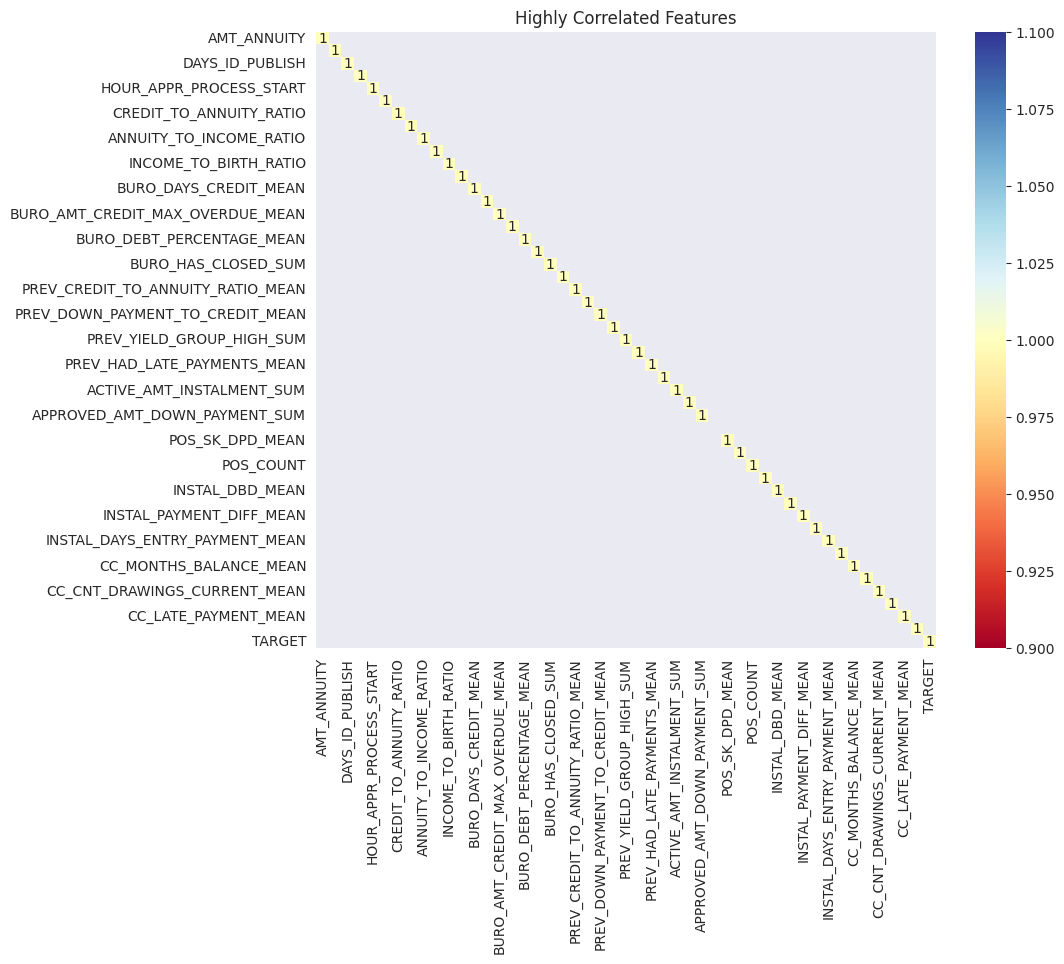

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(globale_corr[highly_correlated], annot=True, cmap="RdYlBu")
plt.title('Highly Correlated Features')
plt.show()

In [17]:
fe810.get_highly_correlated_features(Xt, threshold=0.7)

,Feature 1,Feature 2,Correlation


Pour tester laquelles des features tres correlees est la plus correlee a la TARGET :

In [18]:
# On ne va garder que l'AMT_CREDIT
featureScores[featureScores['Specs'].isin(['REFUSED_APP_CREDIT_PERC_MEAN', 'REFUSED_DAYS_DECISION_MEAN'])]

,Specs,Score
29,REFUSED_APP_CREDIT_PERC_MEAN,343.625198
31,REFUSED_DAYS_DECISION_MEAN,NaN


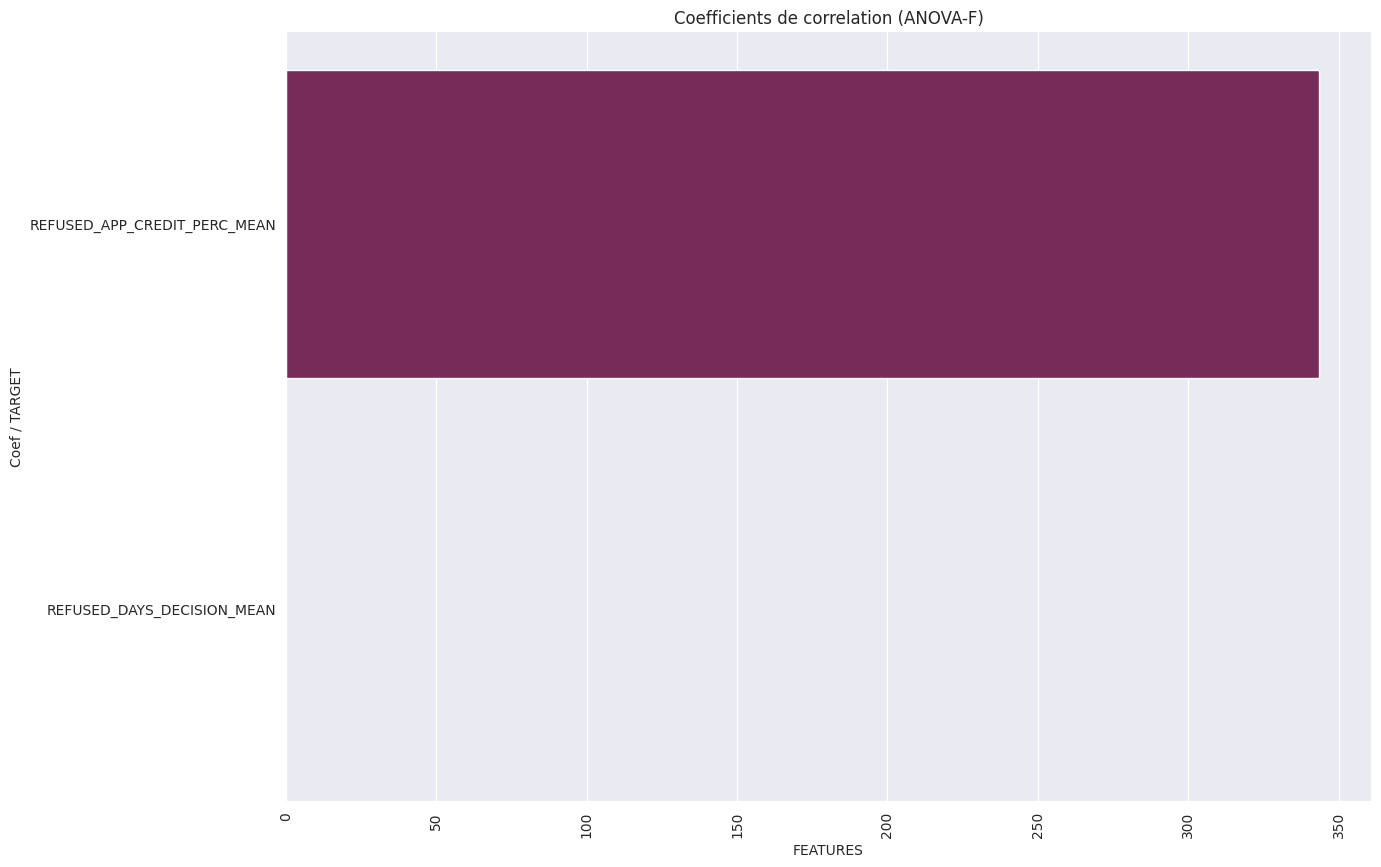

In [19]:
fe810.display_barchart_bivar_correlation(df_poids=featureScores[featureScores['Specs'].isin(['REFUSED_APP_CREDIT_PERC_MEAN', 'REFUSED_DAYS_DECISION_MEAN'])], col_nom='Specs', col_corr='Score', coef='ANOVA-F')